# Introduction

# Libreries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading

In [7]:
# Average sensor data is uploaded every 30 seconds from the control system (PLC) from 07/24 to 07/31

df_avg=pd.read_excel('colorimeter_data.xlsx', sheet_name='average')
df_avg.head()

,Timestamp,Concentration,CU
0,2024-07-24 12:00:00,-0.026042,0.062462
1,2024-07-24 12:00:30,Null,0.061118
2,2024-07-24 12:01:00,Null,0.065011
3,2024-07-24 12:01:30,-0.031562,0.07296
4,2024-07-24 12:02:00,-0.028281,0.074791


The laboratory analysis data is loaded during the same period interval, consider that these samples for analysis are taken every 2 hours, which is the time indicated in the "Time" column, however, the operators recorded the exact time at which the sample was taken in the "Timestamp" column, this will help to cross-reference the information with the PLC data.

In [8]:
# We upload the laboratory data

df_lab=pd.read_excel('colorimeter_data.xlsx', sheet_name='laboratory')
df_lab.head()

,Day,Time,Timestamp,Iodine concentration
0,2024-07-24,1900-01-04 19:00:00,07/24/2024 17:38:00,2.51
1,2024-07-24,1900-01-04 23:00:00,07/24/2024 21:24:00,2.59
2,2024-07-26,1900-01-04 13:00:00,07/26/2024 11:47:00,2.09
3,2024-07-26,1900-01-04 19:00:00,07/26/2024 17:39:00,2.80
4,2024-07-26,1900-01-04 21:00:00,07/26/2024 19:30:00,2.68


# Data Cleaning and Processing

## Sensor data

In [9]:
# The data type of the sensor data frame is reviewed
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      20560 non-null  datetime64[ns]
 1   Concentration  20560 non-null  object        
 2   CU             20560 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 482.0+ KB


In [10]:
# We need data of the numeric type, the operation is performed
df_avg['Concentration'] = pd.to_numeric(df_avg['Concentration'], errors='coerce')
df_avg['CU'] = pd.to_numeric(df_avg['CU'], errors='coerce')

In [11]:
# We review the null data in the dataframe
df_avg.isnull().sum()

Timestamp           0
Concentration    1459
CU               1019
dtype: int64

In [12]:
# Interpolated data is loaded

df_inter=pd.read_excel('colorimeter_data.xlsx', sheet_name='interpolation')
df_inter.head()

,Timestamp,Concentration,CU
0,2024-07-24 12:00:00,-0.047000,0.066354
1,2024-07-24 12:00:30,-0.041719,0.058402
2,2024-07-24 12:01:00,-0.037531,0.062899
3,2024-07-24 12:01:30,-0.033344,0.076766
4,2024-07-24 12:02:00,-0.000935,0.084006


In [14]:
# The data type of the data frame of the interpolated sensor data is reviewed
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      20560 non-null  datetime64[ns]
 1   Concentration  20560 non-null  float64       
 2   CU             20560 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 482.0 KB


In [15]:
# The null data in the average data frame is filled with the interpolated data
df_avg.set_index('Timestamp', inplace=True)
df_inter.set_index('Timestamp', inplace=True)
promedio_filled = df_avg.fillna(df_inter)
promedio_filled.reset_index(inplace=True)

## Lab data

In [16]:
# The Laboratory data type is reviewed
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Day                   10 non-null     datetime64[ns]
 1   Time                  10 non-null     datetime64[ns]
 2   Timestamp             10 non-null     object        
 3   Iodine concentration  10 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 448.0+ bytes


In [18]:
# The "Timestamp" column is transformed into the correct format
df_lab['Timestamp'] = pd.to_datetime(df_lab['Timestamp'])
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Day                   10 non-null     datetime64[ns]
 1   Time                  10 non-null     datetime64[ns]
 2   Timestamp             10 non-null     datetime64[ns]
 3   Iodine concentration  10 non-null     float64       
dtypes: datetime64[ns](3), float64(1)
memory usage: 448.0 bytes


# Results

In [19]:
# Information is cross-referenced between laboratory and sensor data.
df_lab = df_lab[['Timestamp', 'Iodine concentration']]
df_merge = pd.merge(df_lab, promedio_filled[['Timestamp', 'Concentration', 'CU']], on='Timestamp', how='left')
df_merge.head()

,Timestamp,Iodine concentration,Concentration,CU
0,2024-07-24 17:38:00,2.51,3.163125,0.194236
1,2024-07-24 21:24:00,2.59,3.235020,0.197173
2,2024-07-26 11:47:00,2.09,2.764727,0.216067
3,2024-07-26 17:39:00,2.80,3.814625,0.233435
4,2024-07-26 19:30:00,2.68,3.138996,0.231124


The data is graphed to better analyze the data.

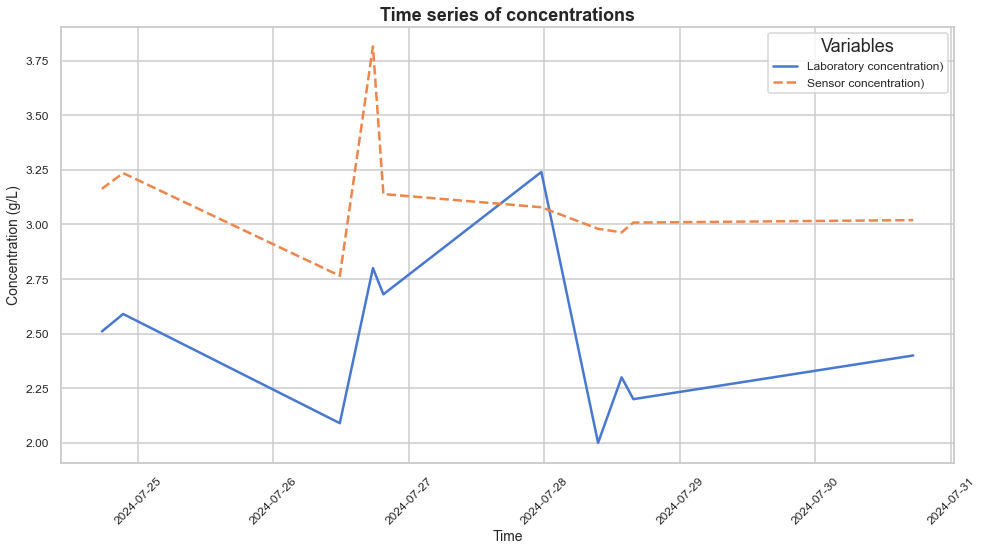

In [26]:
# The graph is configured
sns.set_theme(style="whitegrid", context="talk", palette="muted")

plt.figure(figsize=(14, 8))  # Chart size

sns.lineplot(data=df_merge, x="Timestamp", y="Iodine concentration", label="Laboratory concentration)", linewidth=2.5)
sns.lineplot(data=df_merge, x="Timestamp", y="Concentration", label="Sensor concentration)", linewidth=2.5, linestyle="--")

plt.title("Time series of concentrations", fontsize=18, weight='bold')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Concentration (g/L)", fontsize=14)
plt.legend(title="Variables", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# The graph is shown
plt.show()